### 필요한 라이브러리 설치

In [453]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from datetime import datetime

In [454]:
# 폰트지정
plt.rc('font', family='NanumGothic')

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

### 데이터 로드

In [455]:
# 2023년 1월 ~ 12월 서울시 공공자전거 이용 데이터
# 2023년 1월 ~ 12월 서울시 기상 데이터
file_path1 = 'dataset/서울특별시 공공자전거 일별 대여건수_2023.csv'
file_path2 = 'dataset/OBS_ASOS_DD_2023.csv'
df1 = pd.read_csv(file_path1, encoding='cp949')
df2 = pd.read_csv(file_path2, encoding='cp949')

### 데이터셋 확인
- 데이터타입
- 결측치 
- 이상치
- 중복

In [456]:
# 데이터타입 및 결측치 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여일시    365 non-null    object
 1   대여건수    365 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [457]:
df1.head()

,대여일시,대여건수
0,2023-01-01,"38,037"
1,2023-01-02,"56,609"
2,2023-01-03,"61,252"
3,2023-01-04,"67,721"
4,2023-01-05,"68,711"


In [458]:
# 데이터타입 확인(자세히)
# 대여일시, 대여건수 -> object타입
print(df1.dtypes)

대여일시    object
대여건수    object
dtype: object


In [459]:
# 결측치 확인(자세히) -> 결측치 없음
df1.isnull().sum()

대여일시    0
대여건수    0
dtype: int64

In [460]:
# 이상치 확인을 위해 [대여건수] 컬럼을 정수 타입으로 변경
# 쉼표 제거 및 정수형 변환
df1['대여건수'] = df1['대여건수'].str.replace(',','').astype(int)

In [461]:
# 변환된 데이터타입 확인
print(df1.dtypes)

대여일시    object
대여건수     int32
dtype: object


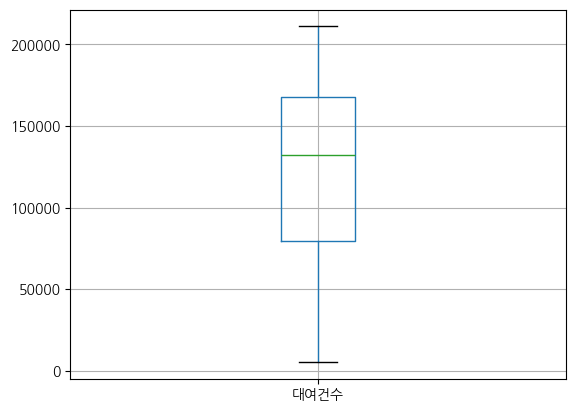

In [462]:
# 이상치 확인 -> 이상치 없음
df1.boxplot(column=['대여건수'])
plt.show()

In [463]:
# 데이터타입 및 결측치 확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   일강수량(mm)       150 non-null    float64
 5   평균 상대습도(%)     365 non-null    float64
 6   합계 일사량(MJ/m2)  365 non-null    float64
 7   일 최심적설(cm)     16 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 22.9+ KB


In [464]:
df2.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm)
0,108,서울,2023-01-01,-0.2,NaN,54.5,10.81,NaN
1,108,서울,2023-01-02,-4.5,NaN,45.9,11.63,NaN
2,108,서울,2023-01-03,-5.0,NaN,49.0,11.77,NaN
3,108,서울,2023-01-04,-1.8,NaN,51.4,10.89,NaN
4,108,서울,2023-01-05,-1.6,NaN,58.1,6.09,NaN


In [465]:
# 데이터타입 확인(자세히)
# 대여일시, 대여건수 -> object타입
print(df2.dtypes)

지점                 int64
지점명               object
일시                object
평균기온(°C)         float64
일강수량(mm)         float64
평균 상대습도(%)       float64
합계 일사량(MJ/m2)    float64
일 최심적설(cm)       float64
dtype: object


In [466]:
# 결측치 확인
# 기상 데이터에는 일강수량, 일 최심적설에 결측치가 존재
df2.isnull().sum()

지점                 0
지점명                0
일시                 0
평균기온(°C)           0
일강수량(mm)         215
평균 상대습도(%)         0
합계 일사량(MJ/m2)      0
일 최심적설(cm)       349
dtype: int64

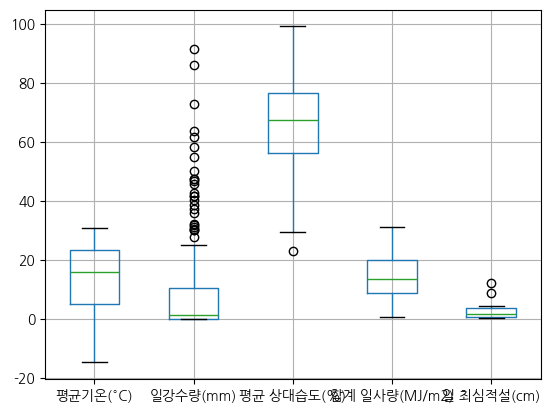

In [467]:
# 이상치 확인
df2.boxplot(column=['평균기온(°C)','일강수량(mm)','평균 상대습도(%)','합계 일사량(MJ/m2)','일 최심적설(cm)'])
plt.show()

### 데이터 전처리
- 불필요한 컬럼 제거
- 컬럼명 변경
- 데이터타입 변환
- 결측치 처리
- 이상치 제거
- 중복 제거

In [468]:
# 컬럼명 변경
df1.rename(columns={'대여일시': 'date', '대여건수': 'rental_count'}, inplace=True)
print(df1.columns)

Index(['date', 'rental_count'], dtype='object')


In [469]:
# 대여일 데이터타입 변경
df1['date'] = pd.to_datetime(df1['date'])
print(df1.dtypes)

date            datetime64[ns]
rental_count             int32
dtype: object


In [470]:
df1.head()

,date,rental_count
0,2023-01-01,38037
1,2023-01-02,56609
2,2023-01-03,61252
3,2023-01-04,67721
4,2023-01-05,68711


In [471]:
# 불필요한 데이터 컬럼 제거(지점, 지점명 불필요)
df2 = df2.iloc[: , 2: ]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   일시             365 non-null    object 
 1   평균기온(°C)       365 non-null    float64
 2   일강수량(mm)       150 non-null    float64
 3   평균 상대습도(%)     365 non-null    float64
 4   합계 일사량(MJ/m2)  365 non-null    float64
 5   일 최심적설(cm)     16 non-null     float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB


In [472]:
df2.head()

,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm)
0,2023-01-01,-0.2,NaN,54.5,10.81,NaN
1,2023-01-02,-4.5,NaN,45.9,11.63,NaN
2,2023-01-03,-5.0,NaN,49.0,11.77,NaN
3,2023-01-04,-1.8,NaN,51.4,10.89,NaN
4,2023-01-05,-1.6,NaN,58.1,6.09,NaN


In [473]:
# 컬럼명 변경
# date = 일시, avg_temperature = 평균기온(°C), precipitation = 일강수량(mm), 
# avg_humidity = 평균 상대습도(%), solar_radiation = 합계 일사량(MJ/m2), snow_depth = 일 최심적설(cm)

df2.rename(columns={
    '일시': 'date',
    '평균기온(°C)': 'avg_temperature',
    '일강수량(mm)': 'precipitation',
    '평균 상대습도(%)': 'avg_humidity',
    '합계 일사량(MJ/m2)': 'solar_radiation',
    '일 최심적설(cm)': 'snow_depth'
}, inplace=True)
print(df2.columns)

Index(['date', 'avg_temperature', 'precipitation', 'avg_humidity',
       'solar_radiation', 'snow_depth'],
      dtype='object')


In [474]:
# 데이터타입 변경
df2['date'] = pd.to_datetime(df2['date'])

In [475]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             365 non-null    datetime64[ns]
 1   avg_temperature  365 non-null    float64       
 2   precipitation    150 non-null    float64       
 3   avg_humidity     365 non-null    float64       
 4   solar_radiation  365 non-null    float64       
 5   snow_depth       16 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [476]:
df2.head()

,date,avg_temperature,precipitation,avg_humidity,solar_radiation,snow_depth
0,2023-01-01,-0.2,NaN,54.5,10.81,NaN
1,2023-01-02,-4.5,NaN,45.9,11.63,NaN
2,2023-01-03,-5.0,NaN,49.0,11.77,NaN
3,2023-01-04,-1.8,NaN,51.4,10.89,NaN
4,2023-01-05,-1.6,NaN,58.1,6.09,NaN


In [477]:
# 결측치 처리
# 강수량, 적설량 => 0으로 대체 후 평균값 처리
df2.fillna(0, inplace=True)

In [478]:
df2['precipitation'] = df2['precipitation'].replace(0, df2['precipitation'].mean())

# 적설량 평균값으로 대체
df2['snow_depth'] = df2['snow_depth'].replace(0, df2['snow_depth'].mean())

In [479]:
# 결측치 확인
df2.isna().sum()

date               0
avg_temperature    0
precipitation      0
avg_humidity       0
solar_radiation    0
snow_depth         0
dtype: int64

In [480]:
df2.head()

,date,avg_temperature,precipitation,avg_humidity,solar_radiation,snow_depth
0,2023-01-01,-0.2,4.380274,54.5,10.81,0.123014
1,2023-01-02,-4.5,4.380274,45.9,11.63,0.123014
2,2023-01-03,-5.0,4.380274,49.0,11.77,0.123014
3,2023-01-04,-1.8,4.380274,51.4,10.89,0.123014
4,2023-01-05,-1.6,4.380274,58.1,6.09,0.123014


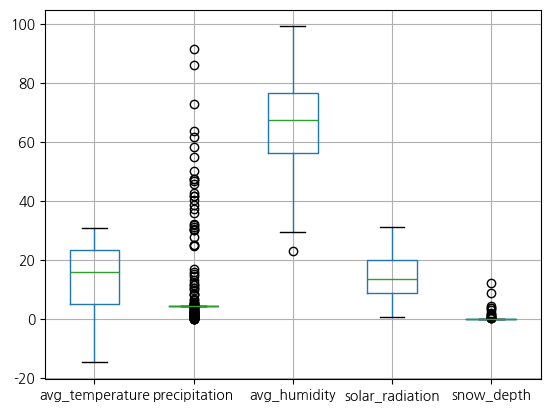

In [481]:
# 이상치 확인
df2.boxplot(column=['avg_temperature','precipitation','avg_humidity','solar_radiation','snow_depth'])
plt.show()

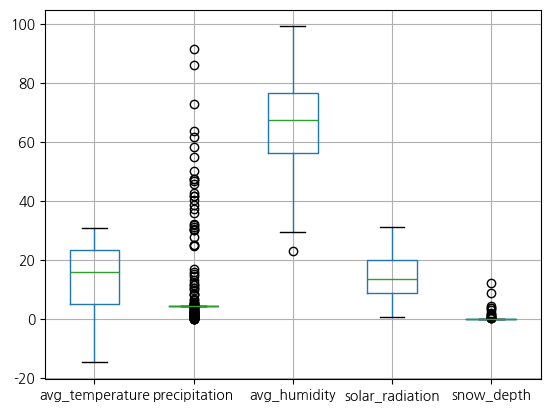

In [482]:
# 이상치 확인
# 상대습도를 제외한 강수량, 적설량 데이터는 계절적 특성으로인해 이상치로 분류

df2.boxplot(column=['avg_temperature','precipitation','avg_humidity','solar_radiation','snow_depth'])
plt.show()

count    43.000000
mean     22.176744
std      26.217732
min       0.100000
25%       1.450000
50%       9.700000
75%      41.000000
max      91.600000
Name: precipitation, dtype: float64


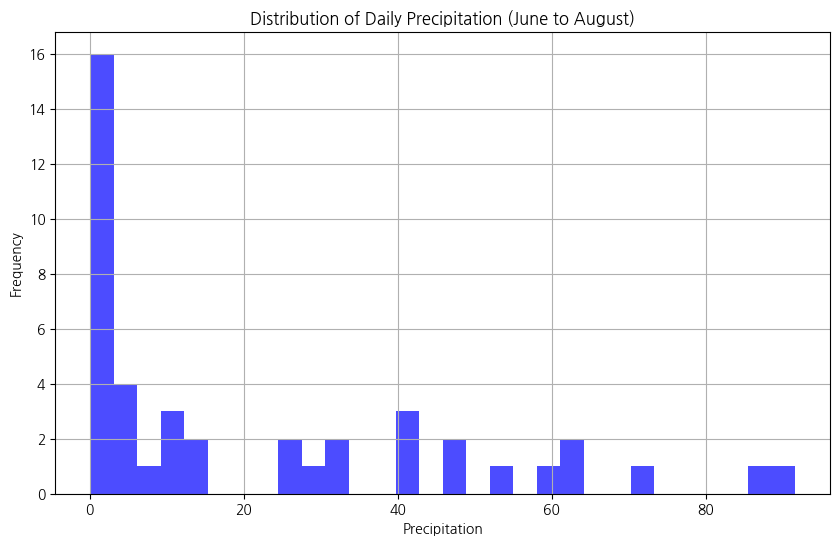

In [383]:
# 6월부터 8월까지의 데이터 필터링
filtered_data = df2[(df2['date'].dt.month >= 6) & (df2['date'].dt.month <= 8)]

# 0인 수치 제외
filtered_data = filtered_data[filtered_data['precipitation'] > 0]

# 기초 통계량 계산
statistics = filtered_data['precipitation'].describe()

# 결과 출력
print(statistics)

# 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['precipitation'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Daily Precipitation (June to August)')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.grid()
plt.show()

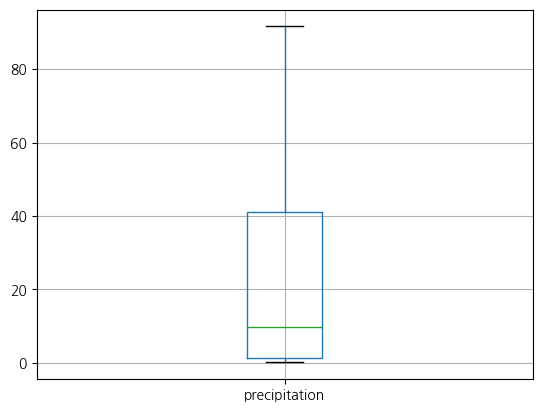

In [384]:
# 이상치 확인
# 계절적 패턴으로 인해 생기는 이상치였음을 확인
filtered_data.boxplot(column = ['precipitation'])
plt.show()

In [385]:
df2['precipitation'] = filtered_data['precipitation']

count    16.000000
mean      2.806250
std       3.343744
min       0.200000
25%       0.575000
50%       1.600000
75%       3.600000
max      12.200000
Name: snow_depth, dtype: float64


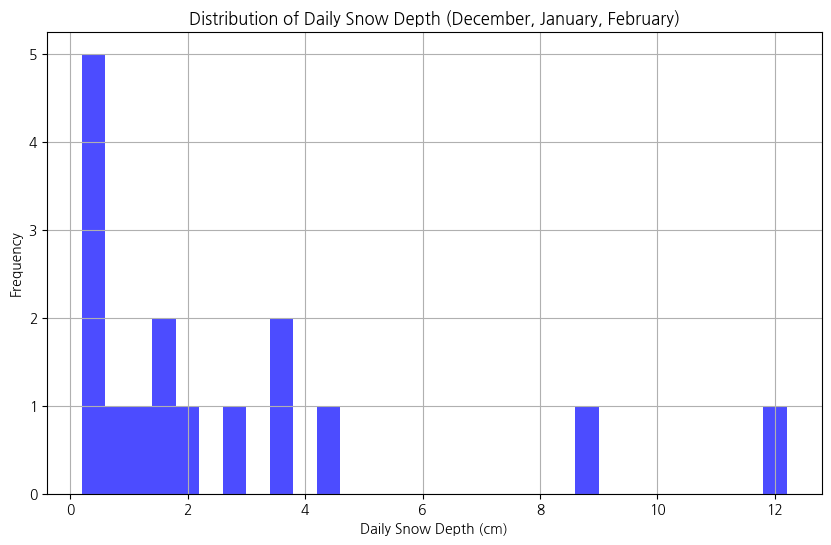

In [386]:
# 2023년 12월, 2024년 1월, 2024년 2월의 데이터 필터링
filtered_data = df2[(df2['date'].dt.month == 12) | (df2['date'].dt.month == 1) | (df2['date'].dt.month == 2)]

# 0인 수치 제외
filtered_data = filtered_data[filtered_data['snow_depth'] > 0]

# 기초 통계량 계산
statistics = filtered_data['snow_depth'].describe()

# 결과 출력
print(statistics)

# 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['snow_depth'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Daily Snow Depth (December, January, February)')
plt.xlabel('Daily Snow Depth (cm)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

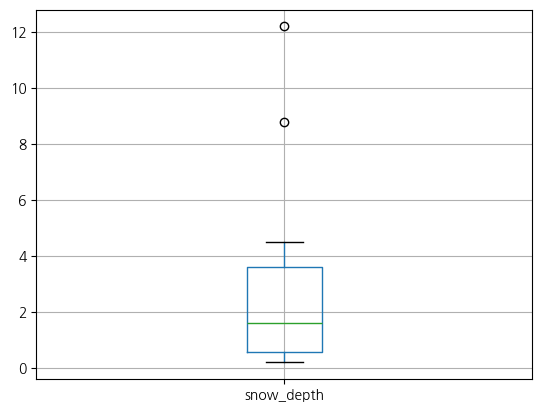

In [387]:
filtered_data.boxplot(column = ['snow_depth'])
plt.show()

In [388]:
# 이상치 처리(적설량)
Q1 = filtered_data['snow_depth'].quantile(0.25)
Q3 = filtered_data['snow_depth'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 상한 및 하한으로 클리핑
df2['snow_depth'] = filtered_data['snow_depth'].clip(lower_bound, upper_bound)

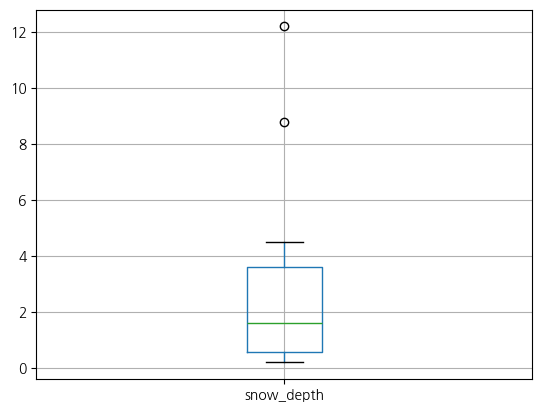

In [389]:
filtered_data.boxplot(column = ['snow_depth'])
plt.show()

In [390]:
# 이상치 처리(상대습도)
Q1 = df2['avg_humidity'].quantile(0.25)
Q3 = df2['avg_humidity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 상한 및 하한으로 클리핑
df2['avg_humidity'] = df2['avg_humidity'].clip(lower_bound, upper_bound)

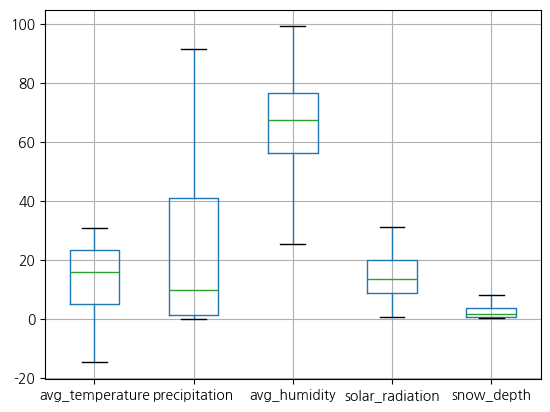

In [391]:
df2.boxplot(column=['avg_temperature','precipitation', 'avg_humidity','solar_radiation', 'snow_depth'])
plt.show()

In [392]:
df2.head()

,date,avg_temperature,precipitation,avg_humidity,solar_radiation,snow_depth
0,2023-01-01,-0.2,NaN,54.5,10.81,NaN
1,2023-01-02,-4.5,NaN,45.9,11.63,NaN
2,2023-01-03,-5.0,NaN,49.0,11.77,NaN
3,2023-01-04,-1.8,NaN,51.4,10.89,NaN
4,2023-01-05,-1.6,NaN,58.1,6.09,NaN


### 데이터 병합
